# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares
       If it set further lows, buy some more
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    
    (Scaling in and out)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 4

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

2000-01-03 00:00:00 BUY  17 SPY @ 145.44
2000-01-04 00:00:00 BUY  17 SPY @ 139.75
2000-01-06 00:00:00 BUY  18 SPY @ 137.75
2000-01-14 00:00:00 BUY  17 SPY @ 146.97
2000-01-19 00:00:00 BUY  17 SPY @ 147.00
2000-01-24 00:00:00 BUY  18 SPY @ 140.34
2000-01-27 00:00:00 BUY  18 SPY @ 140.25
2000-02-03 00:00:00 BUY  18 SPY @ 143.19
2000-02-08 00:00:00 BUY  18 SPY @ 144.31
2000-02-11 00:00:00 BUY  18 SPY @ 138.69
2000-02-17 00:00:00 BUY  19 SPY @ 138.28
2000-02-29 00:00:00 BUY  18 SPY @ 137.44
2000-03-01 00:00:00 BUY  18 SPY @ 138.44
2000-03-02 00:00:00 BUY  19 SPY @ 138.53
2000-03-08 00:00:00 BUY  18 SPY @ 136.88
2000-03-16 00:00:00 BUY  18 SPY @ 146.34
2000-03-30 00:00:00 BUY  17 SPY @ 148.69
2000-04-07 00:00:00 BUY  17 SPY @ 151.44
2000-04-12 00:00:00 BUY  17 SPY @ 146.28
2000-04-13 00:00:00 BUY  18 SPY @ 144.25
2000-04-25 00:00:00 BUY  17 SPY @ 148.16
2000-05-03 00:00:00 BUY  18 SPY @ 140.75
2000-05-15 00:00:00 BUY  18 SPY @ 145.28
2000-05-16 00:00:00 BUY  18 SPY @ 146.69
2000-05-19 00:00

Retrieve log DataFrames

In [7]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [8]:
s.tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
316,2015-03-25,205.76,2015-04-15,210.43,4.67,116.75,25,11121.07
317,2015-03-26,205.27,2015-04-22,210.63,5.36,134.00,25,11255.07
318,2015-04-17,207.95,2015-04-23,211.16,3.21,80.25,25,11335.32
319,2015-04-30,208.46,2015-05-08,211.62,3.16,79.00,25,11414.32
320,2015-05-06,208.04,2015-05-14,212.21,4.17,104.25,25,11518.57
321,2015-05-26,210.70,2015-06-18,212.78,2.08,52.00,25,11570.57
322,2015-06-04,210.13,2015-07-13,209.77,-0.36,-9.00,25,11561.57
323,2015-06-05,209.77,2015-07-14,210.68,0.91,23.66,26,11585.23
324,2015-06-08,208.48,2015-07-16,212.30,3.82,99.32,26,11684.55
325,2015-06-25,209.86,2015-07-17,212.48,2.62,65.50,25,11750.05


In [9]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-10-15,24530.11,24530.11,24530.11,0,24530.11,1
2019-10-16,24530.11,24530.11,24530.11,0,24530.11,1
2019-10-17,24530.11,24530.11,24530.11,0,24530.11,1
2019-10-18,24530.11,24530.11,24530.11,0,24530.11,1
2019-10-21,24530.11,24530.11,24530.11,0,24530.11,1


Generate strategy stats - display all available stats

In [10]:
pf.print_full(s.stats)

start                                                   2000-01-03
end                                                     2019-10-21
beginning_balance                                            10000
ending_balance                                            24530.11
total_net_profit                                          14530.11
gross_profit                                              23595.97
gross_loss                                                -9065.85
profit_factor                                                 2.60
return_on_initial_capital                                   145.30
annual_return_rate                                            4.64
trading_period                           19 years 9 months 18 days
pct_time_in_market                                           39.24
total_num_trades                                               416
num_winning_trades                                             315
num_losing_trades                                             

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2019-10-21 00:00:00 SELL 68 SPY @ 299.99


Plot Equity Curves: Strategy vs Benchmark

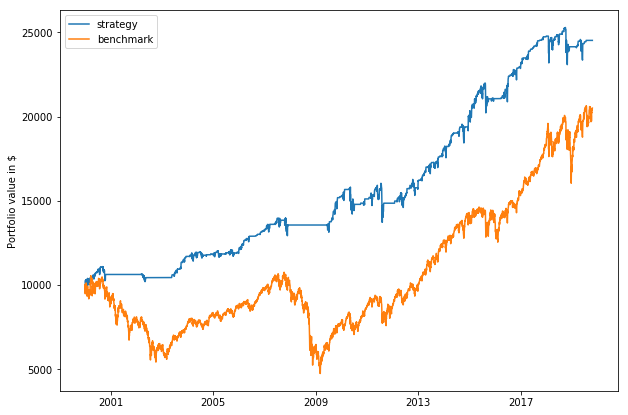

In [12]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

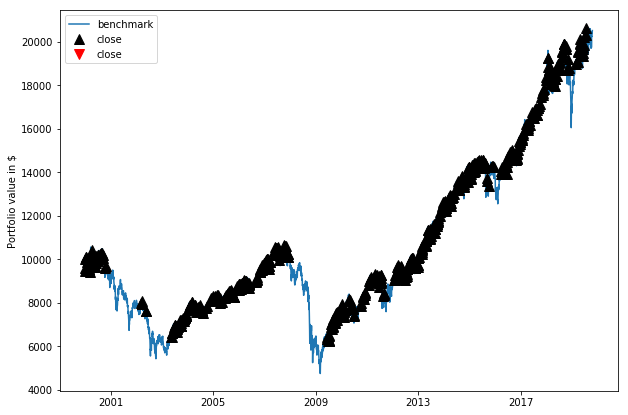

In [13]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,4.64,3.69
max_closed_out_drawdown,-14.37,-55.89
drawdown_annualized_return,-3.10,-15.13
drawdown_recovery,-0.05,-1.42
best_month,8.19,22.21
worst_month,-12.59,-29.43
sharpe_ratio,0.63,0.29
sortino_ratio,0.47,0.37
monthly_std,1.55,4.40


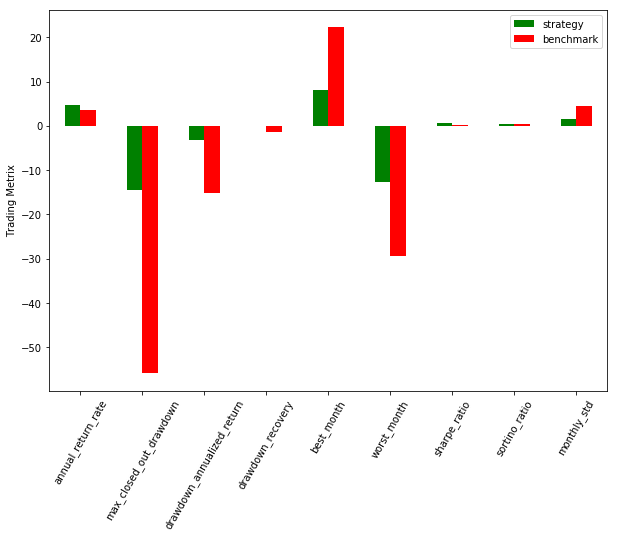

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df